## Binary Classification on  the Human Resources Analytics dataset using ANN

- **We’re trying to predict whether an employee will leave based on various features such as number of projects they worked on, time spent at the company,  last performance review, salary etc.**

- **The dataset has around 15,000 rows and 9 columns.** 

- **The column we’re trying to predict is called “left”. It’s a binary column with 0/1 values. The label 1 means that the employee has left.**

### 1 Importing relevant libraries and dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
# importing the dataset

rawdf = pd.read_csv('HR_comma_sep.csv')
rawdf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 1.1 Data Exploration

In [0]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**We can see that most of the features are numrical except the sales and salary columns which are categorical**

In [0]:
rawdf.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [0]:
# Checking for the ratio of employess who have left and those that haven't left

rawdf.groupby('left').size()

left
0    11428
1     3571
dtype: int64

In [0]:
print('The percentage of employess who have left to no of employees who havent \n',(rawdf['left'].value_counts()*100)/(rawdf['left'].count()))

The percentage of employess who have left to no of employees who havent 
 0    76.191746
1    23.808254
Name: left, dtype: float64


In [0]:
# checking for the presence of missing values

rawdf.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

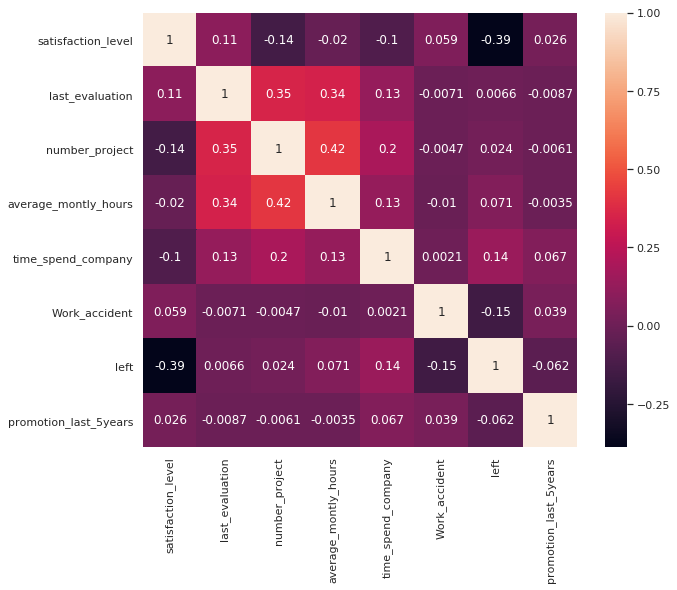

In [0]:
# Checking the correlation between the features 


plt.figure(figsize=(10, 8))
sns.heatmap(rawdf.corr(), annot=True, square=True);

**Observations :**

- **We see that “average_monthly_hours” is positively correlated with “number_project”, which again makes sense. i.e the more projects a person is involved with, the more hours of work they need to put in.**

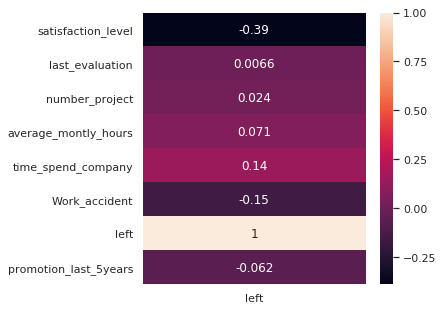

In [0]:
# checking the correlation of the features with the labels (the column named “left”)

plt.figure(figsize=(5, 5))
sns.heatmap(rawdf.corr()[['left']], annot=True);

**Observation:**

- **In this plot, positive values represent correlation and negative values represent inverse correlation with the label.**
- **Only one feature has a strong signal, which is the “satisfaction_level”, inversely correlated with whether the employee has left. This is normal.**

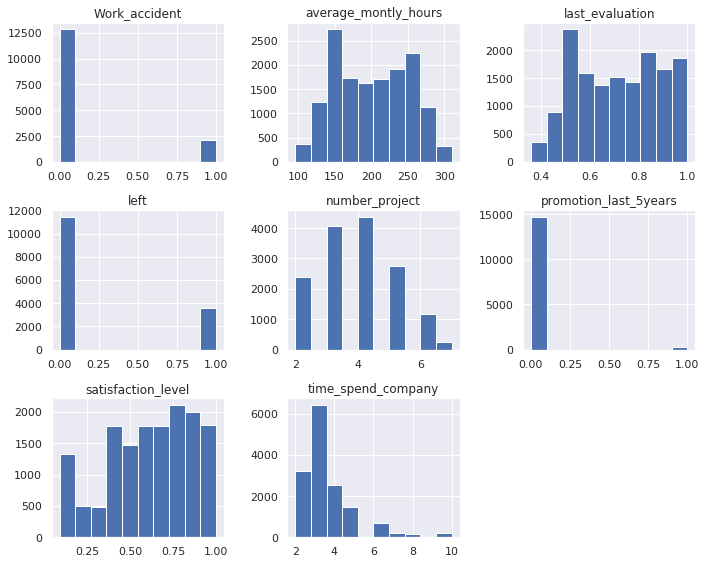

In [0]:
# plotting histograms of the features o understand their distributions 


rawdf.hist(figsize=(10, 8))
plt.tight_layout()

**Observations :**

- **We need to standardize 3 of the features: average_monthly_hours, number_project, and time_spend_company.**
- All other features are within [0, 1]

### 2 Data Preparation

In [0]:
# Standardizing the dataset 

df = rawdf.copy()

sc = StandardScaler()
scale_features = ['average_montly_hours', 'number_project', 'time_spend_company']
df[scale_features] = sc.fit_transform(df[scale_features])

categorical_features = ['sales', 'salary']
df_cat = pd.get_dummies(df[categorical_features])
df = df.drop(categorical_features, axis=1)
df = pd.concat([df, df_cat], axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,-1.462863,-0.882040,-0.341235,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,0.971113,1.220423,1.713436,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,2.593763,1.420657,0.343655,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,0.971113,0.439508,1.028546,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,-1.462863,-0.841993,-0.341235,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:

df.filter(regex=("salary.*")).head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


### 3 Splitting the dataset 

In [0]:
X = df.drop('left', axis = 1).values
y = df['left'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_test.shape, y_train.shape, X_test.shape, y_test.shape)

(4950, 20) (10049,) (4950, 20) (4950,)


### 4 Building the ANN

#### 4.1 Baseline Logistic Regression model

In [0]:
model = Sequential()
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 10049 samples, validate on 4950 samples
Epoch 1/30
10049/10049 [==============================] - 2s 222us/step - loss: 0.5946 - acc: 0.7378 - val_loss: 0.5368 - val_acc: 0.7602
Epoch 2/30
10049/10049 [==============================] - 1s 129us/step - loss: 0.5183 - acc: 0.7614 - val_loss: 0.5117 - val_acc: 0.7592
Epoch 3/30
10049/10049 [==============================] - 1s 128us/step - loss: 0.5026 - acc: 0.7595 - val_loss: 0.5018 - val_acc: 0.7562
Epoch 4/30
10049/10049 [==============================] - 1s 128us/step - loss: 0.4932 - acc: 0.7580 - val_loss: 0.4943 - val_acc: 0.7509
Epoch 5/30
10049/10049 [==============================] - 1s 128us/step - loss: 0.4858 - acc: 0.7537 - val_loss: 0.4878 - val_acc: 0.7509
Epoch 6/30
10049/10049 [==============================] - 1s 131us/step - loss: 0.4794 - acc: 0.7535 - val_loss: 0.4824 - val_acc: 0.7501
Epoch 7/30
10049/10049 [==============================] - 1s 128us/step - l

In [0]:
# listing all the data
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


#### 4.2 Plotting the loss and accuracy history

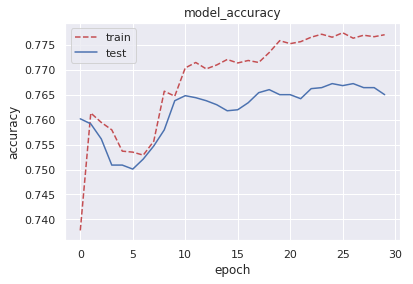

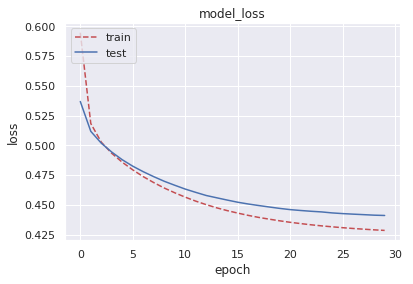

In [0]:
# Get training and test acc histories

training_acc = history.history['acc']
test_acc = history.history['val_acc']

# Get training and test loss histories

training_loss = history.history['loss']
test_loss = history.history['val_loss']


# summarize history for accuracy

plt.plot(history.history['acc'], 'r--')
plt.plot(history.history['val_acc'])   # for validation dataset
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'])  # for validation dataset
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

#### 4.3 Plotting the confusion matrix

In [0]:
# Plotting the confusion matrix 

y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3522  247]
 [ 916  265]]


In [0]:
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      3769
           1       0.52      0.22      0.31      1181

    accuracy                           0.77      4950
   macro avg       0.66      0.58      0.59      4950
weighted avg       0.73      0.77      0.73      4950



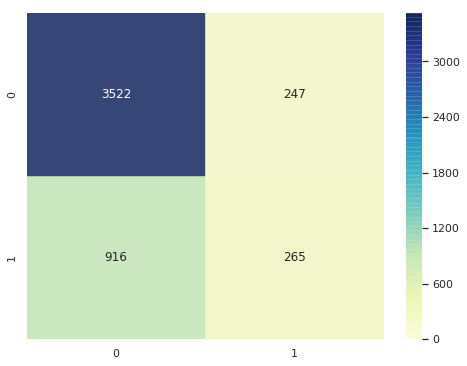

In [0]:
print(classification_report(y_test,y_pred))

plot_confusion_matrix(model, X_test,y_test)

### 5 Building the baseline ANN

In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))